In [ ]:
# Read data from csv
import pandas as pd
import numpy as np

imu_data = pd.read_csv('/content/drive/MyDrive/Sensor Analytics Data/imu_data.csv')

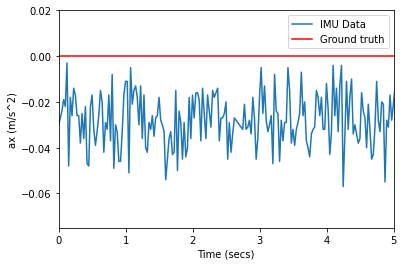

In [ ]:
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R

time = (imu_data['field.header.stamp'] - min(imu_data['field.header.stamp']))*1e-9
r = R.from_quat(np.transpose([imu_data['field.orientation.x'], imu_data['field.orientation.y'], imu_data['field.orientation.z'], imu_data['field.orientation.w']]))
(rot_roll, rot_pitch, rot_yaw) = np.transpose(r.as_euler('xyz', degrees=True))

acc_x = imu_data['field.linear_acceleration.x']
acc_y = imu_data['field.linear_acceleration.y']
acc_z = imu_data['field.linear_acceleration.z']

ideal = time.copy() * 0

fig, ax = plt.subplots(1, 1)
ax.plot(time, acc_x, label="IMU Data")
ax.plot(time, ideal, 'r', label="Ground truth")
ax.set_ylim(-0.075, 0.02)
ax.set_xlim(0, 5)
ax.legend()

ax.set_xlabel("Time (secs)")
ax.set_ylabel("ax (m/s^2)")

plt.show()

# Simple Moving Average

In [ ]:
k = 10

simple_filtered_x = acc_x.copy()
window = np.zeros(k)
for i in range(len(acc_x)):
  if i>=k-1:
    simple_filtered_x[i] = sum(acc_x[i-k+1:i+1])/k
  else:
    simple_filtered_x[i] = sum(acc_x[:i+1])/len(acc_x[:i+1])

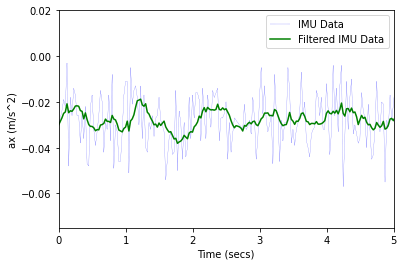

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(time, acc_x, 'b--', label="IMU Data", linewidth=0.2)
ax.plot(time, simple_filtered_x, 'g', label="Filtered IMU Data")
ax.set_ylim(-0.075, 0.02)
ax.set_xlim(0, 5)
ax.legend()

ax.set_xlabel("Time (secs)")
ax.set_ylabel("ax (m/s^2)")

plt.show()

# Cumulative Moving Average

In [ ]:
cumulative_filtered_x = acc_x.copy()
window = np.zeros(k)
cumulative_filtered_x = np.cumsum(acc_x)/np.arange(1,len(acc_x) + 1)

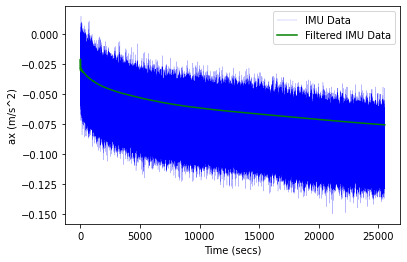

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(time, acc_x, 'b--', label="IMU Data", linewidth=0.2)
ax.plot(time, cumulative_filtered_x, 'g', label="Filtered IMU Data")
# ax.set_ylim(-0.075, 0.02)
# ax.set_xlim(0, 5)
ax.legend()

ax.set_xlabel("Time (secs)")
ax.set_ylabel("ax (m/s^2)")

plt.show()

# Exponential Moving Average

In [ ]:
alpha = 0.1

exp_filtered_x = acc_x.copy()
for i in range(1, len(acc_x)):
  exp_filtered_x[i] = alpha * acc_x[i] + (1-alpha) * exp_filtered_x[i-1]

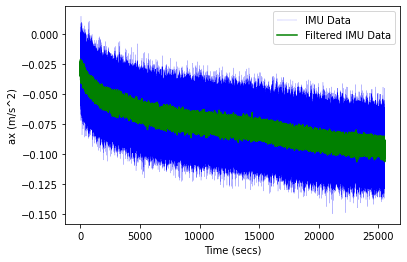

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(time, acc_x, 'b--', label="IMU Data", linewidth=0.2)
ax.plot(time, exp_filtered_x, 'g', label="Filtered IMU Data")
# ax.set_ylim(-0.075, 0.02)
# ax.set_xlim(0, 5)
ax.legend()

ax.set_xlabel("Time (secs)")
ax.set_ylabel("ax (m/s^2)")

plt.show()

# Moving Median Filter

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


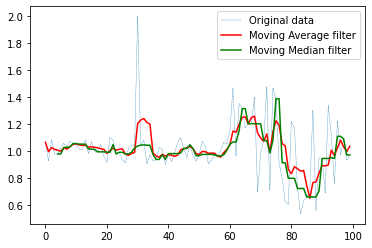

In [ ]:
smooth_data = np.random.uniform(low=0.9, high=1.1, size=(100,))
smooth_data[30] = 2
smooth_data[60:] = (smooth_data[60:] - 1)*5 + 1
x_axis = np.arange(0,len(smooth_data))

mean_filtered = smooth_data.copy()
k = 5
window = np.zeros(k)
for i in range(len(smooth_data)):
  if i>=k-1:
    mean_filtered[i] = sum(smooth_data[i-k+1:i+1])/k
  else:
    mean_filtered[i] = sum(smooth_data[:i+1])/len(smooth_data[:i+1])

median_filtered = smooth_data.copy()
k = 5
window = np.zeros(k)
for i in range(len(smooth_data)):
  median_filtered[i] = np.median(smooth_data[i-k+1:i+1])

fig, ax = plt.subplots(1, 1)
ax.plot(x_axis, smooth_data, '--', linewidth=0.4, label="Original data")
ax.plot(x_axis, mean_filtered, 'r', label="Moving Average filter")
ax.plot(x_axis, median_filtered, 'g', label="Moving Median filter")
ax.legend()
plt.show()